<a href="https://colab.research.google.com/github/Kurniaindahputriemzar12/Clustering-credit-card-customer-for-possible-marketing-strategy/blob/main/Kurnia_Indah_Putri_Emzar_Script_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description

The sample Dataset summarizes the usage behavior of about 8950 active credit card holders. The file is at a customer level with 18 variables. On this project we will develop a customer segmentation to define marketing strategy and treatment for the customer from the dataset.

Link to dataset : https://www.kaggle.com/noordeen/card-usage/version/1?select=CreditCardUsage.csv

# DATA DESCRIPTION

Following is the Data Dictionary for Credit Card dataset:

- CUST_ID: Identification of Credit Card holder (Categorical)
- BALANCE: Balance amount left in their account to make purchases
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
- CASH-ADVANCE_TRX: Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX: Number of purchase transactions made
- CREDIT_LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user
- PRC_FULL_PAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user

In [33]:
# import necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
df =  pd.read_csv('/content/gdrive/MyDrive/Final Project/CreditCardUsage.csv')

In [8]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

info yang bisa didapat dari penjabaran diatas yaitu:
1. total data memiliki 18 column, dimana jumlah column yang mmemiliki 8950 data hanya 16 column (kecuali column MIMINIMUM_PAYMENTS dan CREDIT_LIMIT)
2. Tipe-tipe data yang ada yaitu 14 data bertipe float, 3 data dengan tipe integer dan 1 data bertipe objek
3. Diketahui bahwa ada missing value pada column MIMINIMUM_PAYMENTS dan CREDIT_LIMIT

In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Didapatkan beberapa hal dari df.describe diatas:

1. Balance (saldo) rata rata customer adalah 1564.47, dimana terdapat credit card yang memiliki jumlah saldo minimal berjumlah 0, dan terdapat credit card dengan dengan jumlah saldo maksimal 19043.138560.

2. rata rata balance frequency (frekuensi saldo) 0.877 sehingga dapat dikatakan bahwa saldo sering diperbarui, kemudian terdapat credit card dengan frekuensi saldo 0 yang artinya sangat jarang memperbarui saldo.

3. rata rata purchase (pembelian) dari customer adalah 1003.204 dengan purchase minimal 0 dan pembelian maksimal 49039.57

4. rata rata Oneoff purchase (pembelian sekali jalan) sebesar 593.47, dengan minimal pembelian sekalian jalan adalah 0 dan maksimal 40761.250000.

5. rata rata Installment purchase (pembelian dengan angsuran) sebesar 411.067 dengan minimal 0 dan maksimal sebesar 40761.25.

6. rata rata cash advance (uang tunai dimuka) sebesar 978.87 dengan minimal 0 dan maksimal 47137.211.

7. rata rata purchase frequency (frekuensi pembelian) sebesar 0.49 sehingga perilaku tidak terlalu sering melakukan pembelian.

8. rata rata oneoff purchase frequency (frekuensi pembelian satu kali) terjadi adalah 0.2 artinya para pelanggan sangat jarang untuk melakukan pembyaran sekali jalan.

9. rata rata purchase installment frequency (frekuensi pembayaran angsuran) adalah 0.36 sehingga customer memiliki perilaku jarang melakukan pembayaran angsuran.

10. rata rata vash advance frequency (frekuensi pembayaran dimuka) adalah 0.13 sehingga customer memiliki perilaku jarang melakukan pembayaran uang muka sekali lunas.

11. rata rata uang transaksi dimuka adalah 3.24, sehingga customer memiliki perilaku melakukan pembayaran uang muka dengan jumlah yang kecil.

12. rata rata pembayaran minimal sebesar 864.20.

13. customer didominasi oleh customer yang sudah menikmati jasa bank selama 11 hingga 12 tahun.

# DATA CLEANING

Melakukan pengecekan terhadap missing values

In [11]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
# impute with median
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].median()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].median()

In [13]:
# double check
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
df.describe(include='object')

,CUST_ID
count,8950
unique,8950
top,C10859
freq,1


Kemudian, kita akan men'drop' column CUST_ID dimana memiliki banyak nilai unique sehingga tidak terlalu memberikan informasi.

In [15]:
duplicatesN = df[df.duplicated()]['CUST_ID'].count()
print(f"Number of dupplicated entries: {duplicatesN}")

Number of dupplicated entries: 0


In [16]:
df_new = df.drop('CUST_ID',axis=1)
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
df_new = df_new.dropna().reset_index(drop=True)
df_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [18]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_new)
data_scaled.shape

(8950, 17)

In [19]:
data_imputed = pd.DataFrame(data_scaled, columns=df_new.columns)

# CLUSTERING

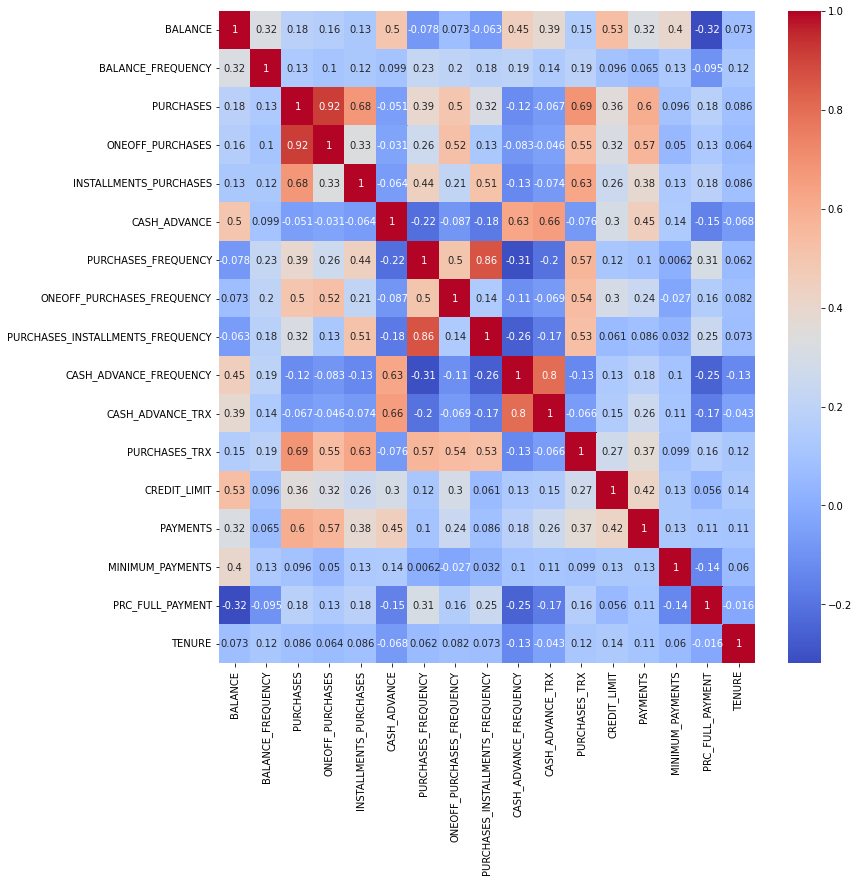

In [21]:
plt.figure(figsize = (12, 12))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', 
            xticklabels=data_imputed.columns,
            yticklabels=data_imputed.columns)

- ada 3 pair korelasi yang tinggi
- "PURCHASES" and "ONEOFF_PURCHASES" = 0.92
- "PURCHASES_FREQUENCY" and 'PURCHASES_INSTALLMENT_FREQUENCY' = 0.86
- "CASH_ADVANCE_TRX" and "CASH_ADVANCE_FREQUENCY" = 0.8

# Clustering using K-Means

In this section we will perform K-Means clustering on the data and check the clustering metrics (inertia, silhouette scores).

In [22]:
# inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
      km = clust(n_clusters = x)
      km = km.fit(X)
      inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()


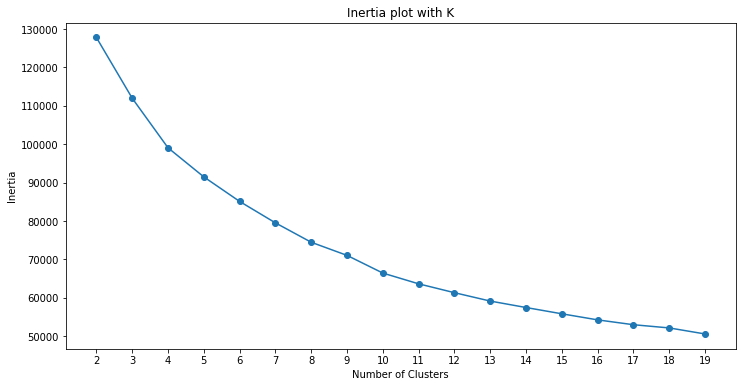

In [23]:
inertia_plot(KMeans, data_imputed)

Didapatkan dengan elbow method bahwa didapatkan jumlah cluster yang berpengaruh besar terhadap perilaku customer yaitu 6 cluster

# Silhouette Scores

In [29]:
def silh_samp_cluster(clust,  X, start=2, stop=5, metric = 'euclidean'):
    # taken from sebastian Raschkas book Python Machine Learning second edition
    for x in range(start, stop):
        km = clust(n_clusters = x)
        y_km = km.fit_predict(X)
        cluster_labels = np.unique(y_km)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(X, y_km, metric = metric)
        y_ax_lower, y_ax_upper =0,0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i)/n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper),
                    c_silhouette_vals,
                    height=1.0,
                    edgecolor='none',
                    color = color)
            yticks.append((y_ax_lower + y_ax_upper)/2.)
            y_ax_lower+= len(c_silhouette_vals)

        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg,
                   color = 'red',
                   linestyle = "--")
        plt.yticks(yticks, cluster_labels+1)
        plt.ylabel("cluster")
        plt.xlabel('Silhouette Coefficient')
        plt.title('Silhouette for ' + str(x) + " Clusters")
        plt.show()

In [25]:
for x in range(2, 7):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(data_imputed)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_imputed, label))

Silhouette-Score for 2 Clusters:  0.20951117145873602
Silhouette-Score for 3 Clusters:  0.2504160232402912
Silhouette-Score for 4 Clusters:  0.1976791965228765
Silhouette-Score for 5 Clusters:  0.19325195080511473
Silhouette-Score for 6 Clusters:  0.2027304988653554


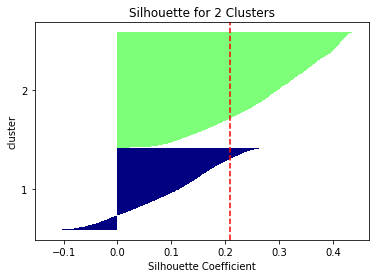

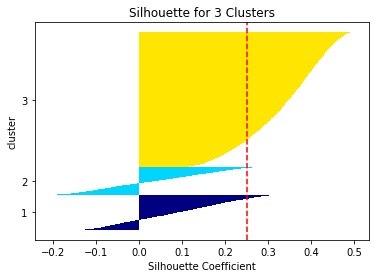

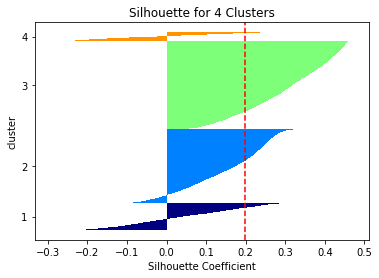

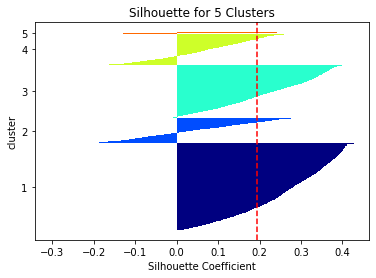

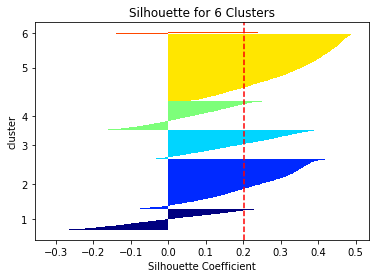

In [34]:
silh_samp_cluster(KMeans, data_imputed, stop=7)

In [ ]:
range_n_clusters = range(2,7)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(data_imputed)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data_imputed, preds)
    print("Silhouette-Score for n_clusters = {}, is {}".format(n_clusters, score))

Silhouette-Score for n_clusters = 2, is 0.2089232822022867
Silhouette-Score for n_clusters = 3, is 0.24786629890647918
Silhouette-Score for n_clusters = 4, is 0.1970448976486613
Silhouette-Score for n_clusters = 5, is 0.19238764053787333
Silhouette-Score for n_clusters = 6, is 0.20769698306515985


Dapat terlihat bahwa kita memiliki low silhouette score. dari hasil elbow juga terlihat bahwa K mean berada pada 3 dan 4 kemudian hasil dari evaluasi model menunjukkan score silhoutte untuk K mean terbaik berada pada K = 3 dengan silhoutte score 24.78%. Tapi kita harus melakukan PCA dikarenakan nilai silhouette score rendah

# Feature Extraction with PCA

In [ ]:
for y in range(2, 7):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(data_imputed)
    for x in range(2, 7):
        alg = KMeans(n_clusters = x, )
        label = alg.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '       Inertia: ',alg.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.4597327687456667        Inertia:  48011.944779642276
Silhouette-Score for 3 Clusters:  0.44711981051287303        Inertia:  31903.246595339155
Silhouette-Score for 4 Clusters:  0.4054100376824246        Inertia:  23719.961847599
Silhouette-Score for 5 Clusters:  0.40031766930516427        Inertia:  18754.26551419331
Silhouette-Score for 6 Clusters:  0.38125514107479247        Inertia:  15686.76535891859

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.33645686007731673        Inertia:  60066.84868065934
Silhouette-Score for 3 Clusters:  0.371621103162713        Inertia:  44932.81809577861
Silhouette-Score for 4 Clusters:  0.3617257322234474        Inertia:  33910.13430651664
Silhouette-Score for 5 Clusters:  0.3603650697969346        Inertia:  28081.16120157631
Silhouette-Score for 6 Clusters:  0.31912545899303146        Inertia:  24436.1089805379

PCA with # of components:  4
Silhouette-Score for 2 Clust

Dari silhoutte score diatas, dapat terlihat bahwa lebih baik apabila komponen PCA memiliki 5 atau 6 cluster saja.

Text(0, 0.5, 'PC2')

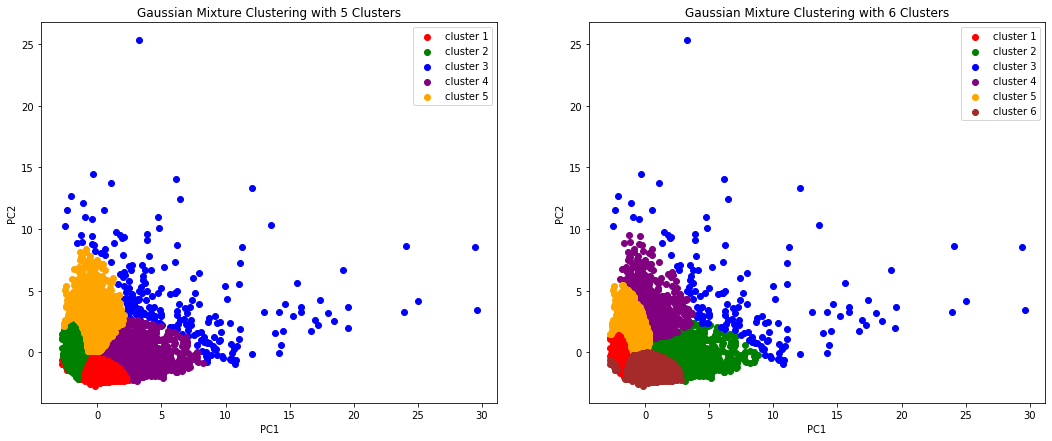

In [35]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(GaussianMixture(n_components = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Gaussian Mixture Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(GaussianMixture(n_components = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('Gaussian Mixture Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# dataframe with best columns
df_final = pd.DataFrame(data_imputed[best_cols])
print('New dataframe with best columns has just been created. Data shape: ' + str(data_final.shape))

New dataframe with best columns has just been created. Data shape: (8636, 7)


# EDA

#ANALISIS SECARA UMUM

In [ ]:
df_new.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

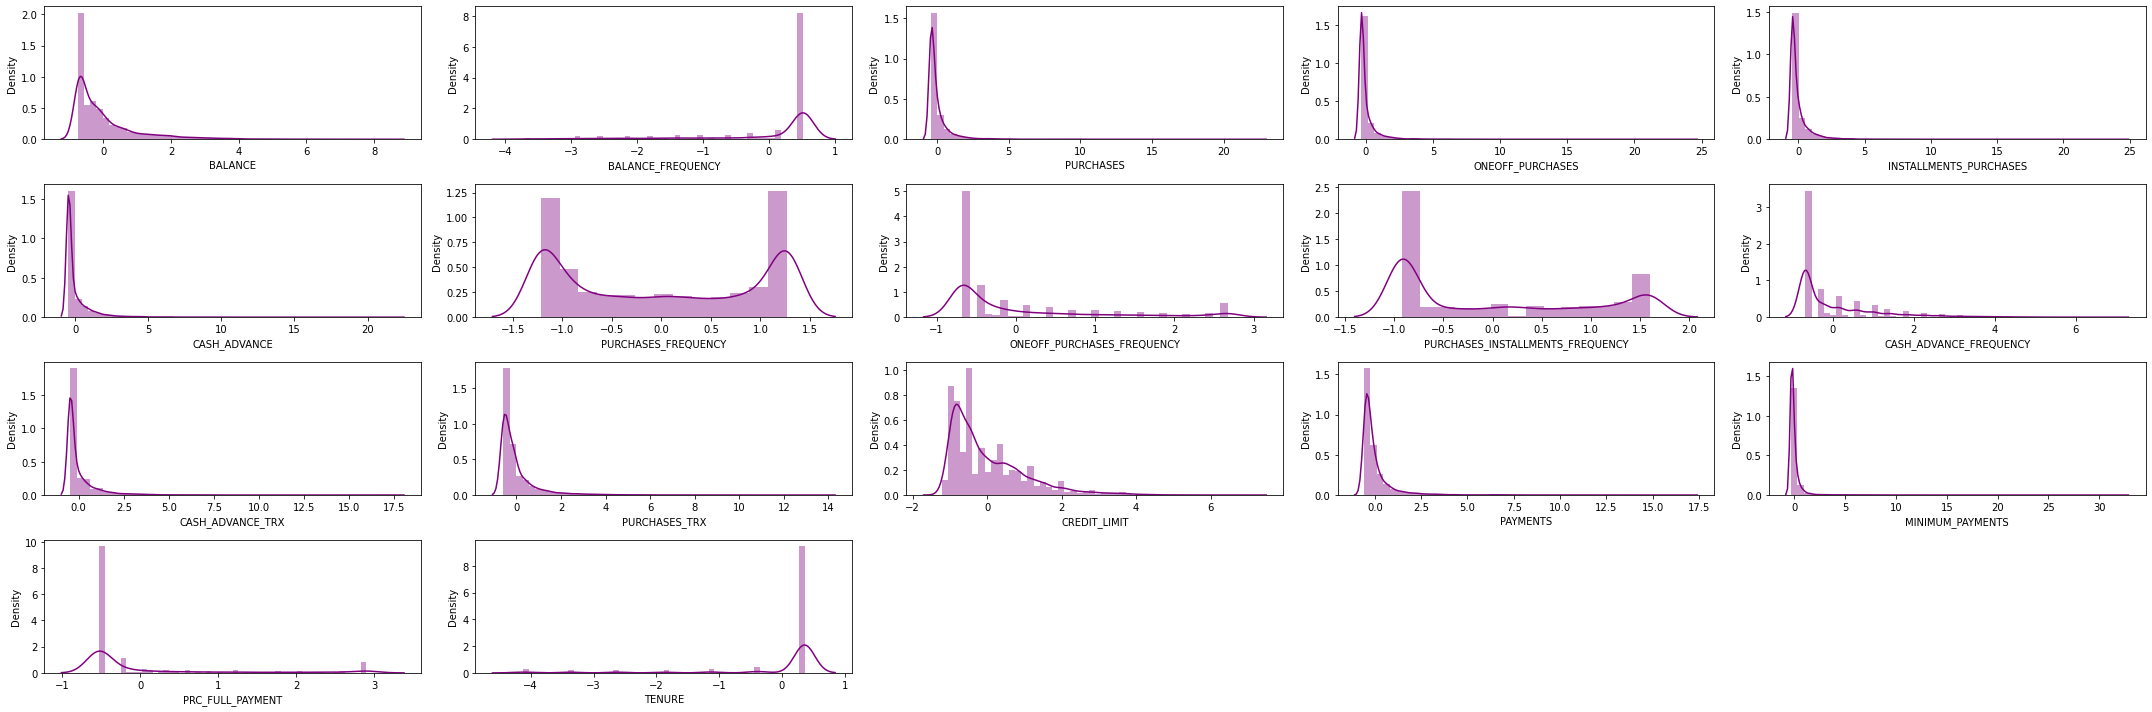

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
plt.margins(2)
num = df_new.select_dtypes(include=['int64', 'float64']).columns
for i in range(0, len(num)):
    plt.subplot(4,5, i+1)
    sns.distplot(df_new[num[i]], color='purple')
    plt.tight_layout()
plt.show()

Dari hasil Visualisasi histogram didapatan beberapa informasi :

- customer didominasi oleh orang orang yang sering melakukan pembaruan saldo.
- customer didominasi oleh orang orang yang yang melakukan jumlah pembelian pada interval 0 hingga 1200.
- customer didominasi dengan pembelian satu kali dengan jumlah pada interval 0-500.
- frekuensi customer yang sering memperbarui saldo dengan - customer yang sering memperbarui saldo relatif sama.
- customer didominasi dengan jumlah saldo pada interval 0 hingga 5000.

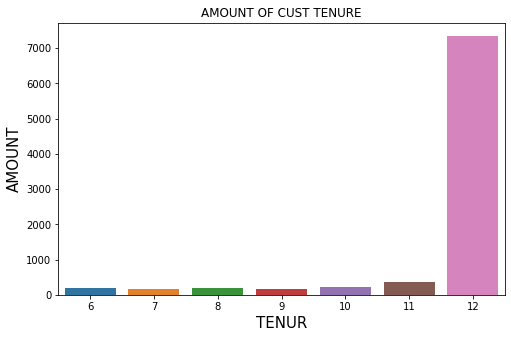

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_new,x='TENURE')
plt.title('AMOUNT OF CUST TENURE')
plt.xlabel('TENUR',fontsize=15)
plt.ylabel('AMOUNT',fontsize=15)
plt.show()

In [ ]:
df_new['TENURE'].value_counts()

12    7346
11     356
10     226
6      184
8      183
7      177
9      164
Name: TENURE, dtype: int64

Sebanyak >7000 customer memiliki jangka tenure selama 12, yang artinya cust memakai jasa bank selama 12 tahun.

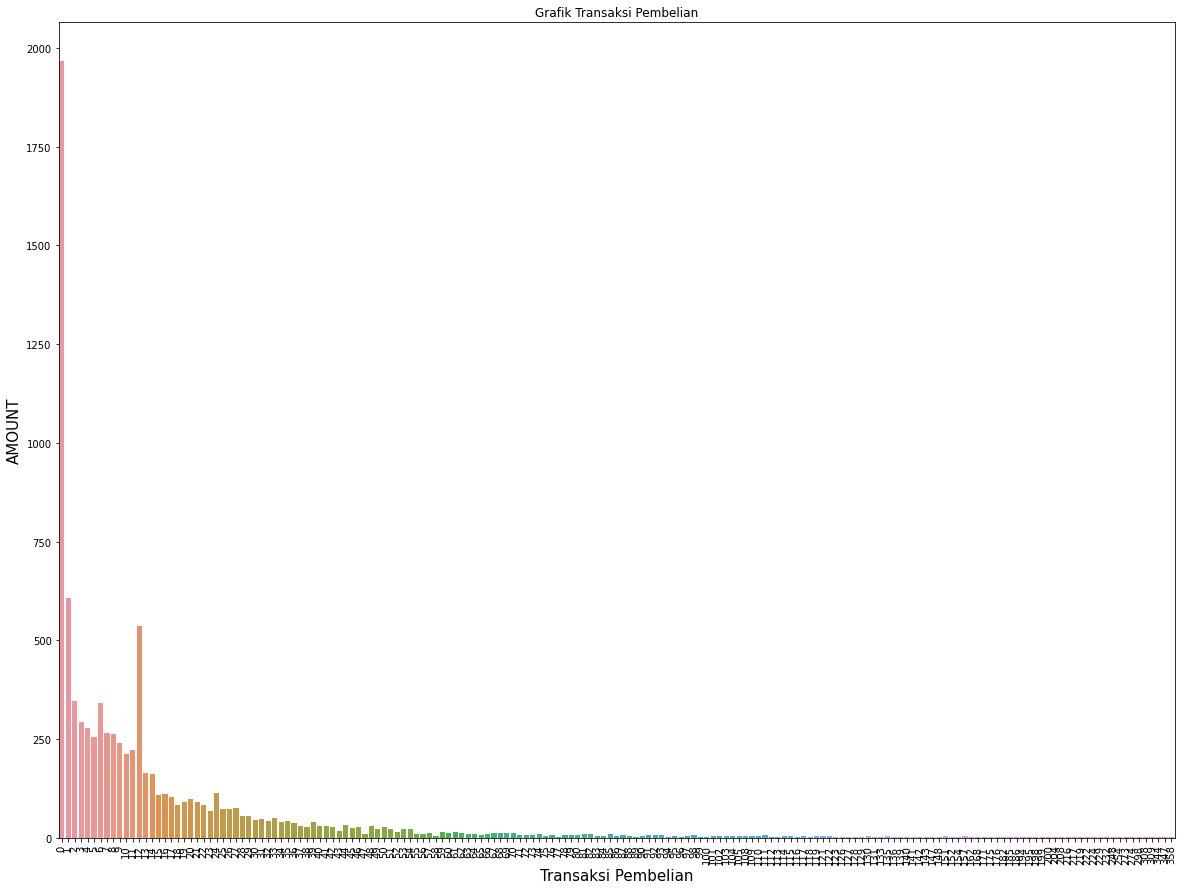

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(data=df_new,x='PURCHASES_TRX')
plt.title('Grafik Transaksi Pembelian')
plt.xlabel('Transaksi Pembelian',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('AMOUNT',fontsize=15)
plt.show()

Dari grafik diatas terlihat bahwa jumlah maksimum terjadi pada customer yang memiliki transaksi pembelian 0, kemudian diurutan kedua adalah dengan 1 transaksi pmbelian kemudian dilanjutkan dengan 12

In [ ]:
#Mencari customer dengan transaksi 0
transaksi_nol = df_new[(df_new['PURCHASES_TRX']==0)]
transaksi_nol.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.0,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000
mean,2208.551872,0.903136,0.399675,0.000122,0.444774,2007.458278,0.000763,0.000042,0.000763,0.276582,6.403152,0.0,4058.218946,1726.829231,1006.934432,0.046313,11.359939
std,2124.674226,0.198900,15.071288,0.005411,15.249476,2500.117089,0.023909,0.001879,0.023909,0.202463,8.182161,0.0,3287.744790,2815.951503,2617.727380,0.140966,1.497567
min,0.001146,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,50.000000,0.049513,0.117036,0.000000,6.000000
25%,825.277817,0.909091,0.000000,0.000000,0.000000,376.484937,0.000000,0.000000,0.000000,0.100000,2.000000,0.0,1500.000000,395.260661,266.765542,0.000000,12.000000
50%,1502.444690,1.000000,0.000000,0.000000,0.000000,1221.854430,0.000000,0.000000,0.000000,0.250000,4.000000,0.0,3000.000000,803.519921,487.840515,0.000000,12.000000
75%,2877.462406,1.000000,0.000000,0.000000,0.000000,2713.655070,0.000000,0.000000,0.000000,0.363636,8.000000,0.0,6000.000000,1780.777957,1011.323846,0.000000,12.000000
max,14581.459140,1.000000,655.680000,0.240000,655.680000,26194.049540,1.000000,0.083333,1.000000,1.500000,123.000000,0.0,19000.000000,34107.074990,61031.618600,1.000000,12.000000


Didaptkan informasi bahwa :
- TENURE customer dengan jumlah transaksi pembelian 0 memiliki rata-rata 11.35 yang artinya customer merupakan customer dengan penggunaan kartu yang lama
-rata-rata saldo yaitu 2208.55

# ANALISIS TIAP CLUSTER

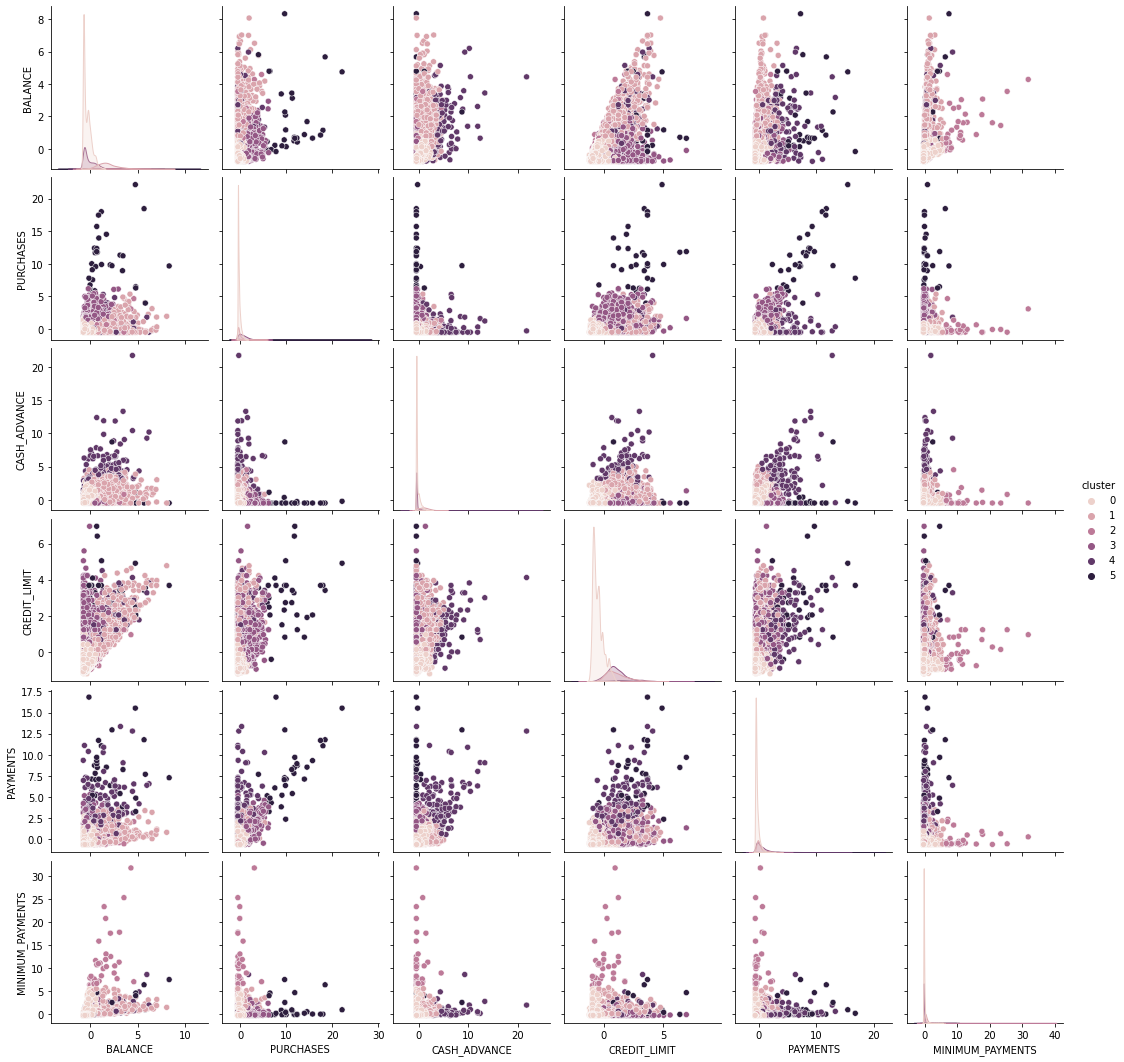

In [ ]:
# apply KMeans clustering
alg = KMeans(n_clusters = 6)
label = alg.fit_predict(df_final)

# create a 'cluster' column
df_final['cluster'] = label
best_cols.append('cluster')

# make a Seaborn pairplot
sns.pairplot(df_final[best_cols], hue='cluster')

- Dapat dilihat bahwa semakin besar BALANCE maka semakin besar pula CREDIT_LIMIT yang diberikan
- Semakin besar PAYMENTS maka semakin besar pula PURCHASES customer (korelasi positif)
- Semakin besar CASH_ADVANCE maka semakin kecil jumlah PAYMENT

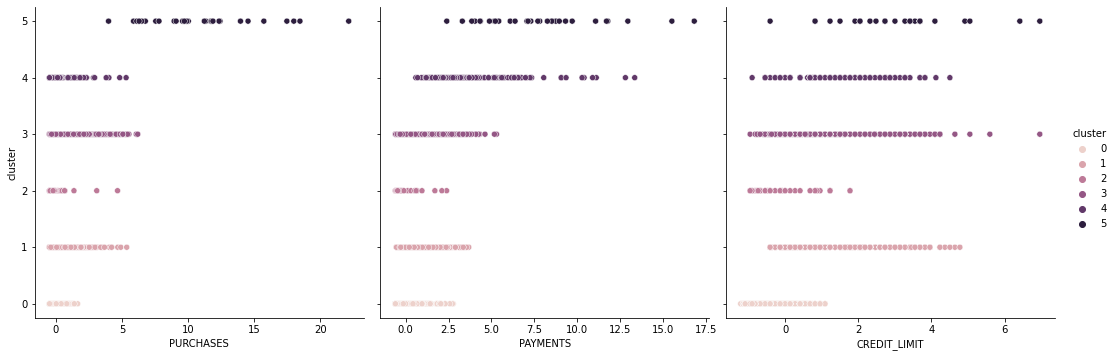

In [ ]:
sns.pairplot(df_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'],
            y_vars=['cluster'],
            height=5, aspect=1)

# Analisis Cluster 0

Pada Cluster 0 dapat dilihat bahwa memiliki jumlah customer tertinggi, dimana jumlah PURCHASES (pembelian) terendah, PAYMENTS (pembayaran) terendah kedua, dan CREDIT_LIMIT (batas kredit) terendah. Dapat Disimpulkan pada cluster 0 ini customer cukup hemat sehingga Bank tidak akan menghasilkan banyak keuntungan dari cluster ini, jadi harus ada semacam strategi untuk menarik customer pada cluster ini lebih banyak.

# Analisis Cluster 1

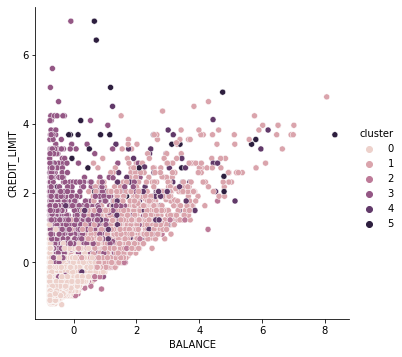

In [ ]:
sns.pairplot(df_final[best_cols], hue='cluster', x_vars=['BALANCE'], y_vars=['CREDIT_LIMIT'],
            height=5, aspect=1)

Cluster ini dapat dikatakan sulit untuk dianalisis dan menentukan strategi pemasarannya, karena batas kredit dan nilai saldo mereka sangat bervariasi. Seperti yang tersaji di grafik di atas terlihat seperti setengahnya terbuat dari warna yang melambangkan warna cluster 1

# Analisis Cluster 2

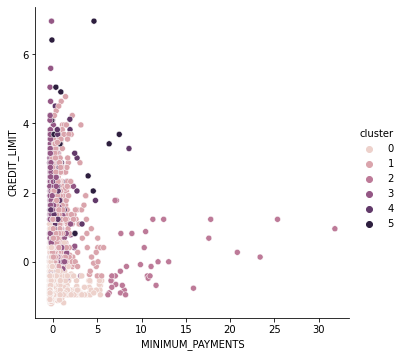

In [ ]:
sns.pairplot(df_final[best_cols], hue='cluster', x_vars=['MINIMUM_PAYMENTS'], y_vars=['CREDIT_LIMIT'],
            height=5, aspect=1)

Cluster ini memiliki MINIMUM_PAYMENTS (pembayaran minimum) yang sangat tinggi sementara memiliki CREDIT_LIMITS (batas kredit) terendah kedua. Dapat disimpulkan bahwa bank telah mengidentifikasi mereka sebagai customer high risk.

# Analisis Cluster 3

Cluster 3 menunujukkan bahwa customer pada kelompok ini secara umum sangat aktif: PURCHASES (pembelian) memiliki nilai tertinggi kedua, PAYMENTS (pembayaran) tertinggi ketiga, dan CREDIT_LIMITS (nilai batas kredit) yang paling bervariasi. Dapat disimpulkan Tipe pengguna kartu kredit ini adalah tipe yang paling tidak perlu Anda habiskan waktu dan tenaga, karena mereka adalah tipe yang ideal.

# Analisis Cluster 4

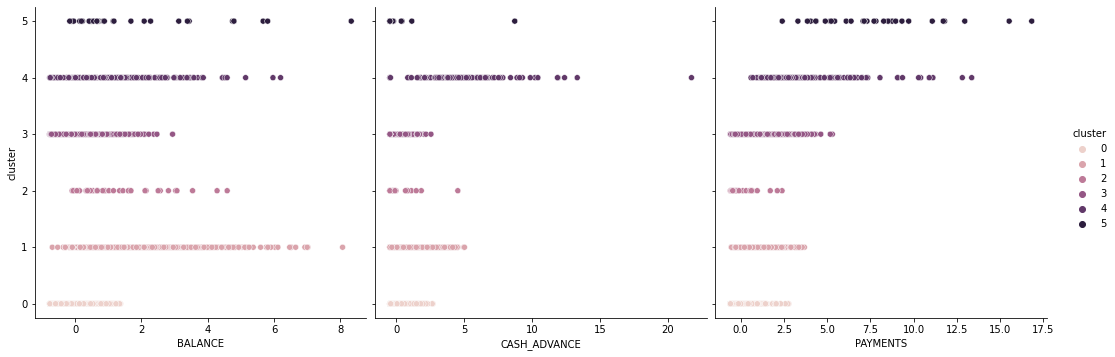

In [ ]:
sns.pairplot(df_final[best_cols], hue='cluster', x_vars=['BALANCE', 'CASH_ADVANCE', 'PAYMENTS'],
            y_vars=['cluster'],
            height=5, aspect=1)

Pada Cluster ini BALANCCE (Saldo) sangat bervariasi, PAYMENTS (pembayaran) tertinggi kedua, PURCHASES (pembelian) diurutan ke 3. Yang perlu diperhatikan pada cluster ini adalah bahwa orang-orang ini memiliki CASH_ADVANCE (penarikan tunai) tertinggi sejauh ini - bahkan ada satu kasus ekstrem yang memiliki 25 poin penarikan tunai

# Analisis Cluster 5

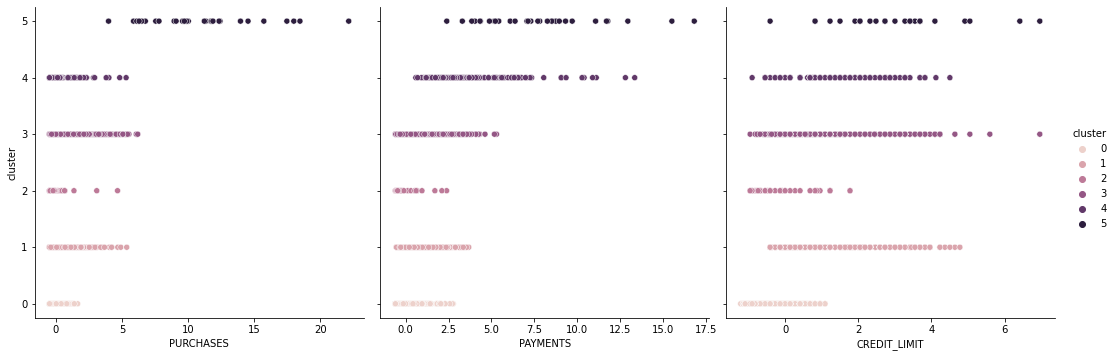

In [ ]:
sns.pairplot(df_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'], y_vars=['cluster'],
            height=5, aspect=1)

Cluster ini memiliki PURCHASES (pembelian) tertinggi, PAYMENTS (pembayaran) tertinggi, ada banyak outlier dalam CLUSTER ini: Customer yang memiliki saldo, pembelian, penarikan tunai, dan pembayaran tinggi yang tidak normal. Grafik di bawah ini akan memberi Anda kesan betapa beratnya outlier cluster ini - hampir semua titik 5 outlier dibandingkan dengan seluruh dataset lainnya.

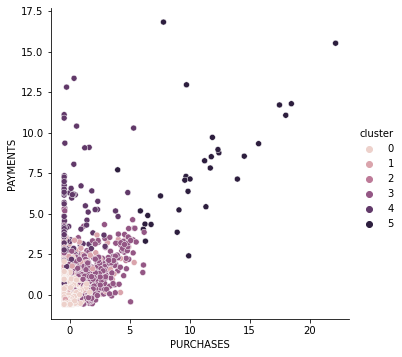

In [ ]:
sns.pairplot(df_final[best_cols], hue='cluster', x_vars=['PURCHASES'], y_vars=['PAYMENTS'],
            height=5, aspect=1)

# KESIMPULAN

Dengan mengelompokkan pelanggan ke dalam enam cluster didapatkan beberapa kemungkinan strategi pemasaran:

- Cluster 0 tidak terlalu aktif menggunakan kartu kredit dalam kehidupan sehari-hari. Secara umum keuangan sehat dan utang rendah. Pada cluster perlu dilakukan dorongan agar customer dapat menggunakan kartu kredit lebih aktif lagi untuk keuntungan perusahaan.

- Analisis cluster 3 menunjukkan bahwa perlunya bank untuk menerapkan strategi pemasaran yang tepat terhadap mereka. customer pada cluster ini adalah target utama yang harus kita fokuskan.

- Customer pada cluster 4 perlu diwaspadai, dimana pada cluster ini terdapat banyak customer memiliki cash_advance tinggi.

- Pada Cluster 2 perlu ditingkatkan strategi pemasaran yang lebih baik dikarenakan customer pada cluster ini tergolong high risk.